In [1]:
import my_module as mm
nets = []
convs = [8, 16, 32, 64]
fcs = [1024, 64, 32]
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

# categories = [
#     "anger",
#     "surprise",
#     "disgust",
#     "fear",
#     "neutral",
#     "happiness",
#     "sad",
# ]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories, limit = 1000)
# X, y = mm.read_pic(mm.pd.read_csv('data/500_picts_satz.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva, batch_size = 4)
print("Done")

Done


In [3]:
for i in range(2, -1, -1):
    for j in range(1, 5):
        nets.append(mm.Net2(1, 350, 350, 8, convs[:j], fcs[i:]))
        print(f'Done with a CNN has {len(convs[:j])} convs layers and {len(fcs[i:])} linear layers')

Done with a CNN has 1 convs layers and 1 linear layers
Done with a CNN has 2 convs layers and 1 linear layers
Done with a CNN has 3 convs layers and 1 linear layers
Done with a CNN has 4 convs layers and 1 linear layers
Done with a CNN has 1 convs layers and 2 linear layers
Done with a CNN has 2 convs layers and 2 linear layers
Done with a CNN has 3 convs layers and 2 linear layers
Done with a CNN has 4 convs layers and 2 linear layers
Done with a CNN has 1 convs layers and 3 linear layers
Done with a CNN has 2 convs layers and 3 linear layers
Done with a CNN has 3 convs layers and 3 linear layers
Done with a CNN has 4 convs layers and 3 linear layers


In [4]:
count = 0
DIR_PATH = './model/'
mm.os.makedirs(DIR_PATH, exist_ok = True)
for net in nets:
    if mm.torch.cuda.is_available():
        mm.torch.cuda.empty_cache()
        net.cuda()
    net = mm.train_process2(device, net, trainloader, LR = 0.1, EPOCH = 2, PRINT = 100)
    count += 1
    PATH = DIR_PATH + "model_" + str(count) + ".pth"
    mm.torch.save(net.state_dict(), PATH)
    print(PATH, "done.")

CrossEntropyLoss()
[1,   100] loss: 2.025
[1,   200] loss: 2.214
[2,   100] loss: 2.219
[2,   200] loss: 2.209
Finished Training
./model/model_1.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.877
[1,   200] loss: 1.902
[2,   100] loss: 1.902
[2,   200] loss: 1.877
Finished Training
./model/model_2.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.757
[1,   200] loss: 1.712
[2,   100] loss: 1.697
[2,   200] loss: 1.729
Finished Training
./model/model_3.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.702
[1,   200] loss: 1.724
[2,   100] loss: 1.732
[2,   200] loss: 1.694
Finished Training
./model/model_4.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.831
[1,   200] loss: 1.869
[2,   100] loss: 1.817
[2,   200] loss: 1.872
Finished Training
./model/model_5.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.727
[1,   200] loss: 1.729
[2,   100] loss: 1.747
[2,   200] loss: 1.729
Finished Training
./model/model_6.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.724
[1,   200] loss: 1.734
[2,  

In [5]:
training_error = []
testing_error = []
count = 0
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 2
Done for model 3
Done for model 4
Done for model 5
Done for model 6
Done for model 7
Done for model 8
Done for model 9
Done for model 10
Done for model 11
Done for model 12


[0.9366666666666666, 0.6144444444444445, 0.45444444444444443, 0.4455555555555556, 0.9877777777777778, 0.45333333333333337, 0.4455555555555556, 0.5322222222222222, 0.45666666666666667, 0.6133333333333333, 0.4455555555555556, 0.6144444444444445]
[0.94, 0.5800000000000001, 0.47, 0.43999999999999995, 1.0, 0.43999999999999995, 0.43999999999999995, 0.48, 0.44999999999999996, 0.5900000000000001, 0.43999999999999995, 0.5800000000000001]


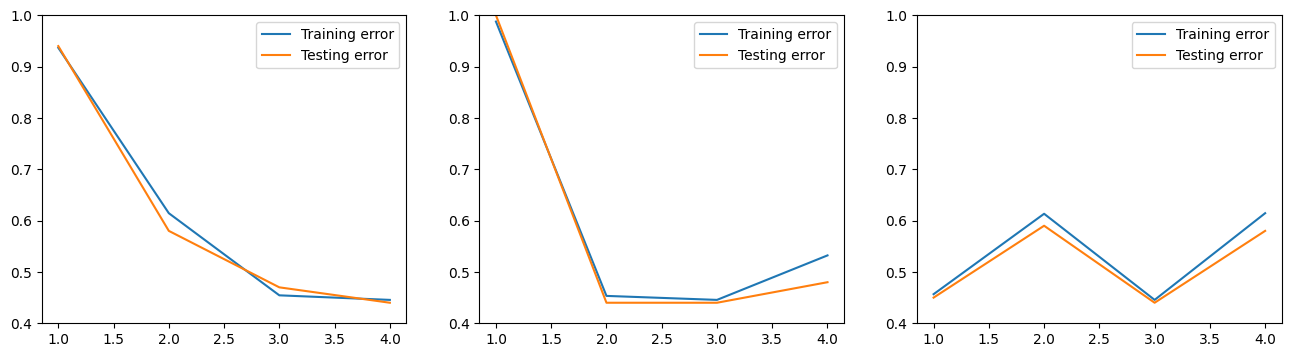

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(1,3, figsize=(16,4))

print(training_error)
print(testing_error)

M = [1, 2, 3, 4]

for i in range(3):
    l = i * 4
    r = i * 4 + 4
    ax[i].plot(M, training_error[l:r], label="Training error")
    ax[i].plot(M, testing_error[l:r], label="Testing error")
    ax[i].legend()
    ax[i].set_ylim(0.4, 1)

FIG_PATH = './plot/'
mm.os.makedirs(FIG_PATH, exist_ok = True)
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"on1000_{current_time}.png"
fig.savefig(FIG_PATH + filename)

CUDA out of memory with higher fliter:
OutOfMemoryError: CUDA out of memory. Tried to allocate 3.65 GiB. GPU 0 has a total capacty of 15.73 GiB of which 200.50 MiB is free. Process 377677 has 2.16 GiB memory in use. Process 442884 has 13.36 GiB memory in use. Of the allocated memory 12.82 GiB is allocated by PyTorch, and 327.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

The third one (lc = [1024, 64, 32]) looks like chaos, so give up using that.
The second one looks closer to get an overfit, do more on second situation in 6-trial.